# Exercise Link

Link -> https://github.com/mrdbourke/tensorflow-deep-learning#-08-introduction-to-nlp-natural-language-processing-in-tensorflow-exercises

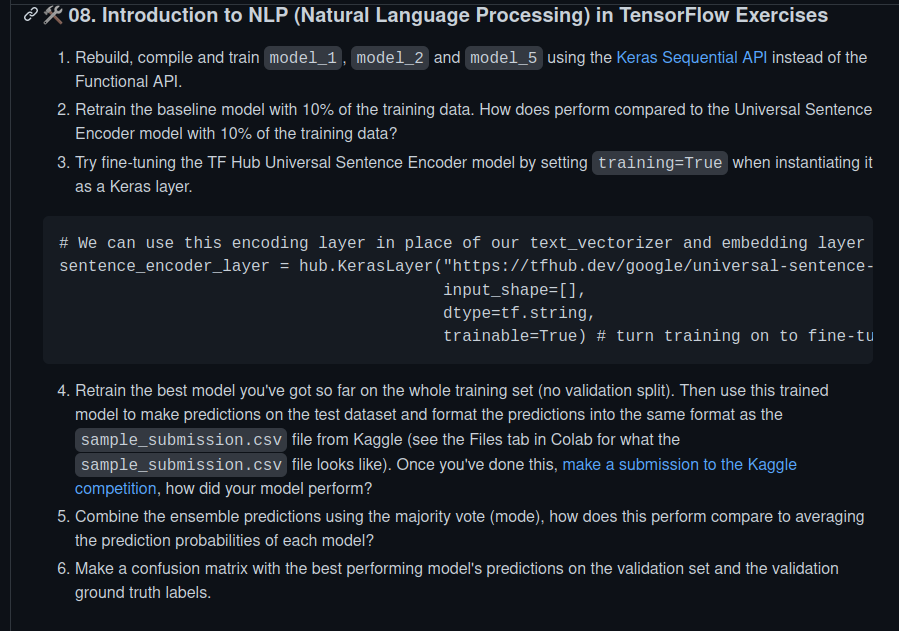


## Extra-curriculum



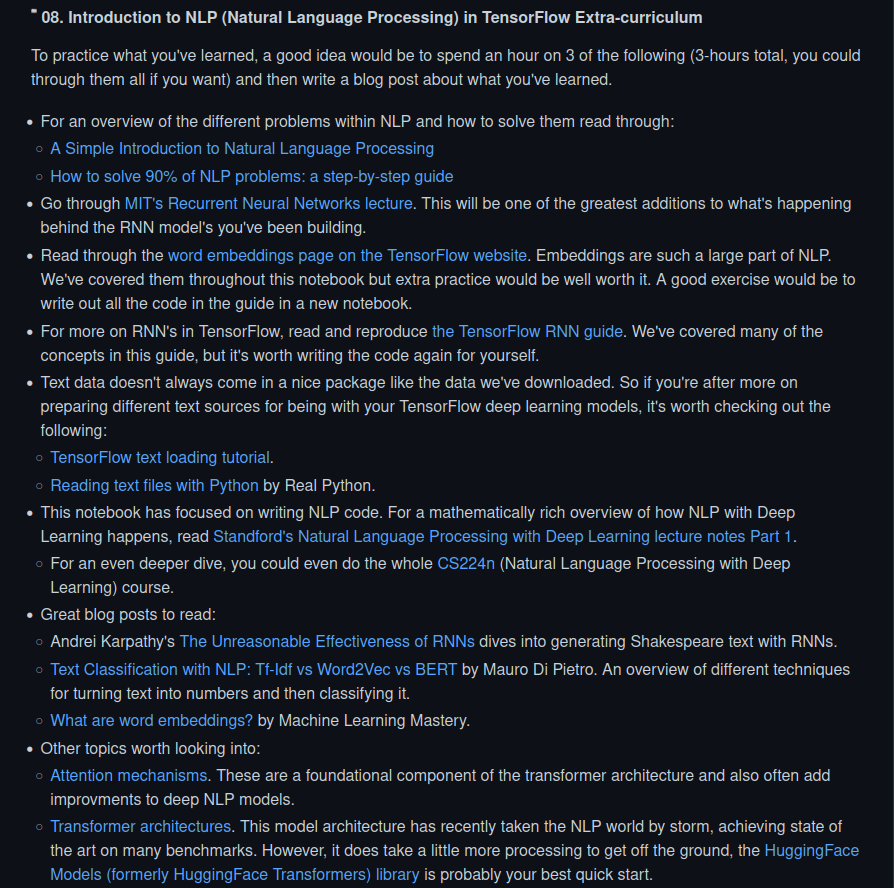